3 УРОК

ПРОДВИНУТЫЙ PANDAS И ЗНАКОМСТВО С ВИЗУАЛИЗАЦИЕЙ НА PYTHON

In [ ]:
# Задача № 1
# Переменная names содержит в себе строку, где хранятся имена в формате 'Name1 Surname1, Name2 Surname2, …'.
# Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

# Переменная names уже задана.

In [ ]:
names_list = names.split(', ')

In [ ]:
# Задача № 2
# В переменной df содержатся данные такого вида

# Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
# Поместите результат в переменную medium_35.

In [ ]:
medium_35 = df.query("wealth == 'medium' and age > 35 " )

In [ ]:
# Задача № 3

# Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:



# Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.



# Note: колонка называется 'Клиент id' - шрифт плохо передаёт кейс i в id

In [ ]:
df = df.rename(columns = {'Клиент id' : 'client_id', 'Пол' : 'sex', 'Благосостояние' : 'wealth', 'Возраст' : 'age'})

In [ ]:
# Задача № 4
# Добавьте в исследуемый нами датафрэйм df колонку older_than_30, 
# в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)


In [ ]:
df['older_than_30'] = df.age > 30


In [ ]:
# Задача № 5
# А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [ ]:
unique_num = df.nunique()

In [ ]:
# Задача № 6
# У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:



# Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id,
# и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

# Предыдущий датафрейм загружен в переменную df, новый – в data 

In [ ]:
full_data = df.merge(data, on = 'client_id', how='inner')

In [ ]:
# Задача № 7
# 💀 Сложное задание! 💀

# Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

# принимает на вход один параметр – путь к файлу
# при помощи переданного пути, считывает файл, в котором разделителем является ;
# считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
# возвращает результат этих действий (агрегированный датафрэйм)
# Данные выглядят вот так, скачать можно отсюда.



# P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.

# P.P.S. В задании надо указать только функцию, указывать конкретный путь к файлу не нужно.
# Он будет содержаться в аргументе функции внутри системы LMS!

In [1]:
import pandas as pd


In [2]:
path_to_file = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/learn_pandas/companies.csv"

In [4]:
df = pd.read_csv(path_to_file , sep = ';')

In [5]:
df

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02
...,...,...,...
288,Сэтл групп,6152279994,2004-03-30
289,ОАО «Горшков Чернов»,26623978007,2004-03-30
290,НПО «Фадеев»,84314056422,1998-09-03
291,Петролеум Трейдинг,95528839292,1975-01-31


In [11]:
 income_return = df.groupby('company',as_index = False ).agg({'income' : 'mean'})

In [12]:
 income_return

,company,income
0,En +,9.962187e+10
1,"АО «Александрова, Савельев и Мельникова»",7.206782e+10
2,АО «Андреев-Анисимов»,6.931948e+09
3,АО «Андреев-Макарова»,8.934380e+10
4,АО «Большаков Кошелева»,7.860861e+10
...,...,...
284,Щекиноазот,4.309092e+10
285,Щукин Лимитед,6.703036e+10
286,Эйвон Бьюти Продактс Компани (Avon),2.503657e+10
287,Яковлева Инкорпорэйтед,3.523436e+10


In [15]:
def read_n_agg(path):
    df = pd.read_csv(path , sep = ';')
    income_return = df.groupby('company',as_index = True ).agg({'income' : 'mean'})
    
    return income_return

In [16]:
read_n_agg(path_to_file)



,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [ ]:
## Задача № 8
# Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, 
# и парой других деталей. Данные можно скачать здесь.

# journey_id – уникальный id поездки
# user_id – id пользователя
# driver_id – id водителя
# taxi_id – id машины
# icon – тип поездки
# start_type – тип заказа (asap, reserved, delayed)
# start_at – время начала поездки
# start_lat – исходное местоположение пользователя, широта
# start_lon – исходное местоположение пользователя, долгота
# end_at – время окончания поездки
# end_lat – итоговое местоположение, широта
# end_lon – итоговое местоположение, долгота
# end_state – состояние заказа
# driver_start_lat – исходное местоположение водителя, широта
# driver_start_lon – исходное местоположение водителя, долгота
# arrived_at – время прибытия водителя
# source – платформа, с которой сделан заказ
# driver_score – оценка водителя клиентом
# rider_score – оценка клиента водителем
 

# Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
# Загрузите датасет, используя ; в качестве разделителя. 

# Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
# Результат запишите в переменную taxi.

In [3]:
import pandas as pd
path_to_file = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/hall_of_fame/3_taxi_peru.csv"
taxi = pd.read_csv(path_to_file, parse_dates = ['start_at', 'end_at', 'arrived_at'] , sep = ';')


In [7]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:34:00,"-12,13874817","-76,99536133",2010-01-06 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:29:00,"-12,13885117","-76,99530029",2010-01-06 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-11-09 23:55:00,"-12,08995438","-76,92626953",2010-12-09 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-11-09 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-02-10 05:26:00,"-12,09253011","-77,02875271",2010-02-10 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-02-10 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [ ]:
## Задача № 9
# Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [9]:

taxi.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score'],
      dtype='object')

In [22]:
taxi['source'].value_counts(normalize = True).round(2)*100

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [ ]:
## Задача № 10
# Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

# Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), 
# а по оси y – количество заказов (абсолютные значения).

# Какой график получился?

In [23]:
taxi['source'].value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [32]:
taxi.groupby('source').agg({'source' : 'count'})

,source
source,
Android,4909
Wap,136
iPad,571
iPhone,9741
web,7631


In [36]:
taxi['source'].reset_index()

,index,source
0,0,iPhone
1,1,iPhone
2,2,iPhone
3,3,iPhone
4,4,iPhone
...,...,...
23106,23106,iPhone
23107,23107,Android
23108,23108,Android
23109,23109,Android


In [67]:
source_count = taxi.groupby('source', as_index = False).agg({'journey_id' : 'count'}).sort_values('journey_id', ascending = False)


In [68]:
source_count

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [56]:
import seaborn as sns

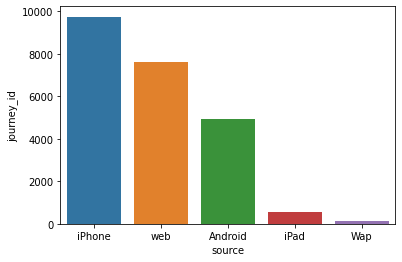

In [69]:
sns.barplot(x="source", y="journey_id", data=source_count)

In [ ]:
## Задача № 11
# Альтернативный вариант построения распределения категориальной переменной – sns.countplot.
# В качестве единственного аргумента можно передать всего одну колонку: например, source, 
# а количество значений для оси y функция посчитает самостоятельно.

# sns.countplot(taxi['source'])


# Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

In [71]:
taxi.shape

(23111, 19)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


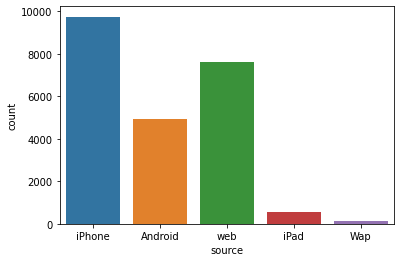

In [72]:
sns.countplot(taxi['source'])

In [76]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


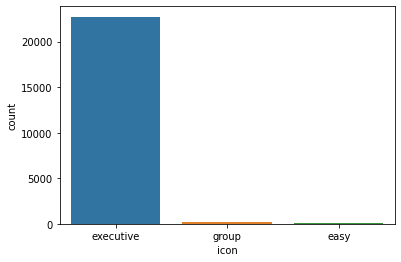

In [77]:
sns.countplot(taxi['icon'])

In [ ]:
## Задача № 12
# Теперь попробуем построить более сложный график!

# С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа)
# в разбивке по платформам (source).

# Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. 
# Далее выберите верные утверждения.

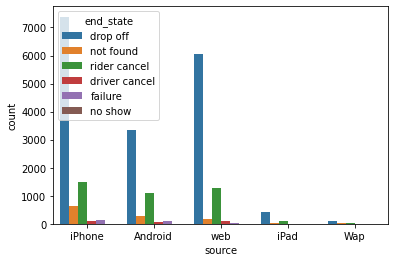

In [78]:
sns.countplot(x='source', hue='end_state', data=taxi)

In [ ]:
## Задача № 13
# Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

# Посчитайте частоту встречаемости каждой из оценок
# Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# Сбросьте индексы
# Переименуйте колонки в driver_score и percentage
# Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# Запишите результат в driver_score_counts
 

# Полезные функции:

# .mul() – умножение, более удобный вариант для использования в цепочке методов 
# .round() – округление
# .reset_index() – сбросить индекс
# .value_counts() – сколько раз встречается каждое значение переменной
 

In [ ]:
# correspondance = {'driver_score': 'new', 'obsolete': 'modified'}
# df.rename(columns=correspondance)

In [11]:
driver_score_counts = taxi['driver_score'].value_counts(normalize = True).mul(100).round(2).reset_index()


In [12]:
driver_score_counts.sort_values('driver_score')

,index,driver_score
5,2.0,0.81
4,1.0,1.23
3,3.0,2.97
2,0.0,14.30
1,4.0,21.88
0,5.0,58.81


In [16]:
driver_score_counts = taxi.driver_score\
    .value_counts(normalize = True)\
    .mul(100).round(2)\
    .reset_index()\
    .rename(columns = {'index':'driver_score', 'driver_score':'percentage'})\
    .sort_values('driver_score')

In [17]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [ ]:
## Задача № 14
# Теперь строим график! Сначала импортируем библиотеки:

#     import seaborn as sns
#     import matplotlib.pyplot as plt

# Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
    
# ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
# ax.set(xlabel='Driver score', ylabel='Percentage')
# sns.despine()  # убрать часть рамки графика
# plt.show()


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

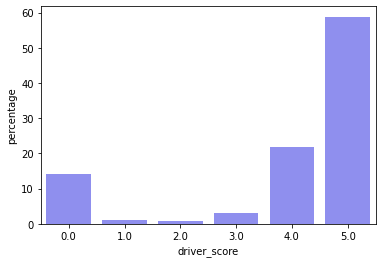

In [28]:
ax = sns.barplot(x= 'driver_score', y= 'percentage', data=driver_score_counts, color='blue', alpha=0.5)

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Driver score')]

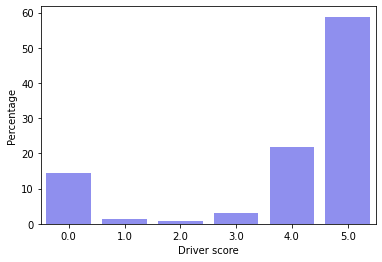

In [29]:
ax = sns.barplot(x= 'driver_score', y= 'percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')

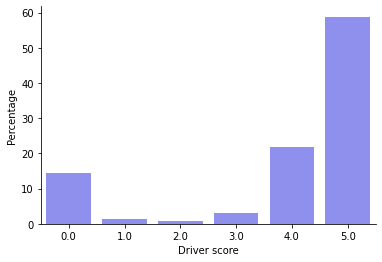

In [25]:
ax = sns.barplot(x= 'driver_score', y= 'percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
# plt.show()

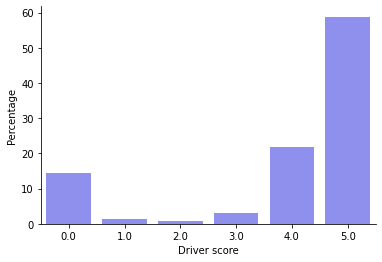

In [30]:
ax = sns.barplot(x= 'driver_score', y= 'percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
## Задача № 15
# 💀 Сложное задание! 💀

# Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
# В чем его отличие от распределения оценок водителей?

In [32]:
rider_score_counts = taxi.rider_score\
    .value_counts(normalize = True)\
    .mul(100).round(2)\
    .reset_index()\
    .rename(columns = {'index':'rider_score', 'rider_score':'percentage'})\
    .sort_values('rider_score')

In [33]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


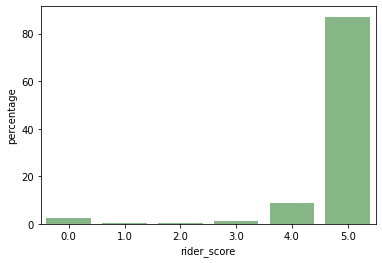

In [34]:
sx = sns.barplot(x= 'rider_score', y= 'percentage', data=rider_score_counts, color='green', alpha=0.5)